https://www.kaggle.com/karthikbhandary2/boat-sales -- вот датасет с яхтами.

1) Постройте модель зависимости цены яхты от ее параметров. 

2) Насколько модель точна? (в качестве метрики можно выбрать mean absolute error)

3) Какие факторы в какой степени влияют на цену?

P.S. Если вам покажется, что яхты это скучно, вы можете взять любой другой датасет с kaggle)

In [51]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import rgb2hex
%matplotlib inline
import seaborn as sns
sns.set()
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [52]:
boat_data = pd.read_csv('C:/Users/fuzzy/Documents/GitHub/SPBGU-Analitics-2021/homeworks/itrushnikova/01-12-2021/boat_data.csv')

In [53]:
boat_data.head()

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,CHF 3337,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,Switzerland Â» Lake Geneva Â» VÃ©senaz,226
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75
2,CHF 3770,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,Switzerland Â» Lake of Zurich Â» StÃ¤fa ZH,124
3,DKK 25900,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,Denmark Â» Svendborg,64
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58


#данные цен представлены в разной валюте и надо будет привести к одной валюте

In [54]:
boat_data.info() #видим, что есть пропуски в наших данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9879 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


теперь надо заменить пропущенные значения средними

In [55]:
boat_data['Length'] = boat_data['Length'].fillna(boat_data['Length'].median()) 
boat_data['Length'] = boat_data['Length'].fillna(boat_data['Length'].median())

удалим пропуски

In [56]:
boat_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        9888 non-null   object 
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9832 non-null   float64
 7   Material                     8139 non-null   object 
 8   Location                     9852 non-null   object 
 9   Number of views last 7 days  9888 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 772.6+ KB


In [57]:
boat_data = boat_data.dropna()

In [58]:
boat_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7019 entries, 1 to 9887
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Price                        7019 non-null   object 
 1   Boat Type                    7019 non-null   object 
 2   Manufacturer                 7019 non-null   object 
 3   Type                         7019 non-null   object 
 4   Year Built                   7019 non-null   int64  
 5   Length                       7019 non-null   float64
 6   Width                        7019 non-null   float64
 7   Material                     7019 non-null   object 
 8   Location                     7019 non-null   object 
 9   Number of views last 7 days  7019 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 603.2+ KB


In [59]:
boat_data = boat_data[boat_data['Year Built']!=0]

In [60]:
def convert_into_usd(x):
    exchange_rate_based_usd = {"USD":1, "EUR":0.88,"CHF": 0.92, "DKK": 6.57,"Â£" : 0.75}
    l = x.split(" ")
    currency, amount = l[0], l[1]
    return np.round(float(amount) / exchange_rate_based_usd[currency], 2)
    
boat_data['price_in_USD'] = boat_data['Price'].apply(lambda x: convert_into_usd(x))

In [34]:
boat_data # видим цену в долларах

,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,price_in_USD
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany Â» BÃ¶nningstedt,75,3965.91
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany Â» Bayern Â» MÃ¼nchen,58,3862.50
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland Â» Seengen,239,3804.35
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy Â» Lake Garda Â» Moniga del Garda (BS),69,3977.27
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland Â» Zugersee Â» Neuheim,113,5000.00
...,...,...,...,...,...,...,...,...,...,...,...
9877,CHF 5000,Cabin Boat,Princess power boats,Used boat,1974,7.20,2.70,GRP,Switzerland Â» Rhein Â» MÃ¶hlin,1299,5434.78
9878,CHF 4999,"Sport Boat,Wakeboard/Wakesurf,Water ski",Tullio Abbate power boats,"Used boat,Unleaded",1980,6.00,2.10,GRP,Switzerland Â» Lake of Zurich Â» Rafz,1917,5433.70
9882,CHF 4950,Fishing Boat,Staempfli power boats,"Used boat,Unleaded",1984,6.00,1.62,Plastic,Switzerland Â» Bielersee Â» Gerolfingen,288,5380.43
9885,EUR 4499,Sport Boat,BlueCraft power boats,"new boat from stock,Unleaded",2020,4.40,1.80,GRP,Germany Â» Nordrhein-Westfalen Â» Wesel,354,5112.50


теперь разделим нашу выборку, изменим качественные переменные, сделаем модели предсказания

In [61]:
X = boat_data[['Boat Type', 'Type', 'Material', 'Number of views last 7 days']]
y = boat_data['price_in_USD']

In [62]:
X = pd.get_dummies(X)

In [63]:
X.head()

,Number of views last 7 days,Boat Type_Bowrider,"Boat Type_Bowrider,Cabin Boat,Deck Boat","Boat Type_Bowrider,Center console boat,Sport Boat","Boat Type_Bowrider,Classic","Boat Type_Bowrider,Deck Boat,Water ski","Boat Type_Bowrider,Motor Yacht,Sport Boat","Boat Type_Bowrider,Motor Yacht,Wakeboard/Wakesurf","Boat Type_Bowrider,Sport Boat,Wakeboard/Wakesurf","Boat Type_Bowrider,Wakeboard/Wakesurf",...,Material_Aluminium,Material_Carbon Fiber,Material_GRP,Material_Hypalon,Material_PVC,Material_Plastic,Material_Rubber,Material_Steel,Material_Thermoplastic,Material_Wood
1,75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,58,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10,239,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
12,69,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13,113,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
X_train.shape #обучающая выборка

(4941, 143)

In [65]:
X_test.shape # тестовая выборка

(1648, 143)

In [66]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [49]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

ValueError: Unknown label type: 'continuous'

In [67]:
prediction = lg.predict(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [68]:
X_test['prediction'] = prediction

NameError: name 'prediction' is not defined

In [74]:
X_test.head()

,Number of views last 7 days,Boat Type_Bowrider,"Boat Type_Bowrider,Cabin Boat,Deck Boat","Boat Type_Bowrider,Center console boat,Sport Boat","Boat Type_Bowrider,Classic","Boat Type_Bowrider,Deck Boat,Water ski","Boat Type_Bowrider,Motor Yacht,Sport Boat","Boat Type_Bowrider,Motor Yacht,Wakeboard/Wakesurf","Boat Type_Bowrider,Sport Boat,Wakeboard/Wakesurf","Boat Type_Bowrider,Wakeboard/Wakesurf",...,Material_Carbon Fiber,Material_GRP,Material_Hypalon,Material_PVC,Material_Plastic,Material_Rubber,Material_Steel,Material_Thermoplastic,Material_Wood,target
1318,179,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,74988.64
7088,99,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,82954.55
8941,220,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,31806.82
4453,61,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,397727.27
1612,256,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,101086.96


In [75]:
X_test['prediction'] = prediction
X_test['target'] = y_test

NameError: name 'prediction' is not defined

In [72]:
X_test.corr()

,Number of views last 7 days,Boat Type_Bowrider,"Boat Type_Bowrider,Cabin Boat,Deck Boat","Boat Type_Bowrider,Center console boat,Sport Boat","Boat Type_Bowrider,Classic","Boat Type_Bowrider,Deck Boat,Water ski","Boat Type_Bowrider,Motor Yacht,Sport Boat","Boat Type_Bowrider,Motor Yacht,Wakeboard/Wakesurf","Boat Type_Bowrider,Sport Boat,Wakeboard/Wakesurf","Boat Type_Bowrider,Wakeboard/Wakesurf",...,Material_Carbon Fiber,Material_GRP,Material_Hypalon,Material_PVC,Material_Plastic,Material_Rubber,Material_Steel,Material_Thermoplastic,Material_Wood,target
Number of views last 7 days,1.000000,-0.001618,NaN,NaN,-0.009848,NaN,0.273829,0.045087,NaN,NaN,...,0.005717,0.096054,NaN,-0.181722,0.243479,-0.012979,-0.039946,0.059433,0.060961,-0.055637
Boat Type_Bowrider,-0.001618,1.000000,NaN,NaN,-0.004492,NaN,-0.004492,-0.004492,NaN,NaN,...,-0.011906,0.021885,NaN,-0.015642,-0.017471,-0.004492,-0.047310,0.060905,-0.023526,-0.062311
"Boat Type_Bowrider,Cabin Boat,Deck Boat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Boat Type_Bowrider,Center console boat,Sport Boat",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Boat Type_Bowrider,Classic",-0.009848,-0.004492,NaN,NaN,1.000000,NaN,-0.000607,-0.000607,NaN,NaN,...,-0.001609,-0.039480,NaN,-0.010907,-0.002362,-0.000607,-0.006395,-0.001215,0.190925,-0.010128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Material_Rubber,-0.012979,-0.004492,NaN,NaN,-0.000607,NaN,-0.000607,-0.000607,NaN,NaN,...,-0.001609,-0.039480,NaN,-0.010907,-0.002362,1.000000,-0.006395,-0.001215,-0.003180,-0.008441
Material_Steel,-0.039946,-0.047310,NaN,NaN,-0.006395,NaN,-0.006395,-0.006395,NaN,NaN,...,-0.016951,-0.415829,NaN,-0.114882,-0.024874,-0.006395,1.000000,-0.012802,-0.033495,-0.024297
Material_Thermoplastic,0.059433,0.060905,NaN,NaN,-0.001215,NaN,-0.001215,-0.001215,NaN,NaN,...,-0.003222,-0.079032,NaN,-0.021834,-0.004728,-0.001215,-0.012802,1.000000,-0.006366,-0.020233
Material_Wood,0.060961,-0.023526,NaN,NaN,0.190925,NaN,-0.003180,-0.003180,NaN,NaN,...,-0.008429,-0.206782,NaN,-0.057128,-0.012369,-0.003180,-0.033495,-0.006366,1.000000,-0.034532


<AxesSubplot:>

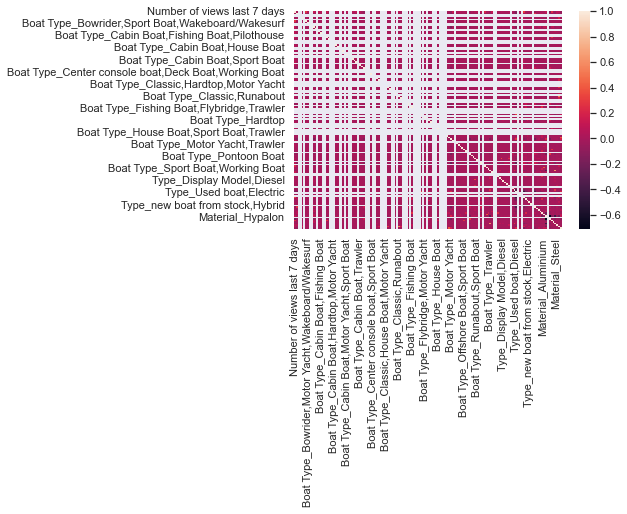

In [76]:
sns.heatmap(X_test.corr())